In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

data = pd.read_csv('/Users/arm2/Downloads/Python for Finance and Investment (Udemy)/MSFT_2000.csv', index_col = 'Date')

In [2]:
log_returns = np.log(1 + data.pct_change())

In [3]:
log_returns.tail()

,MSFT
Date,
12-10-2017,0.009118
13-10-2017,0.004786
16-10-2017,0.002063
17-10-2017,-0.000773
18-10-2017,0.000258


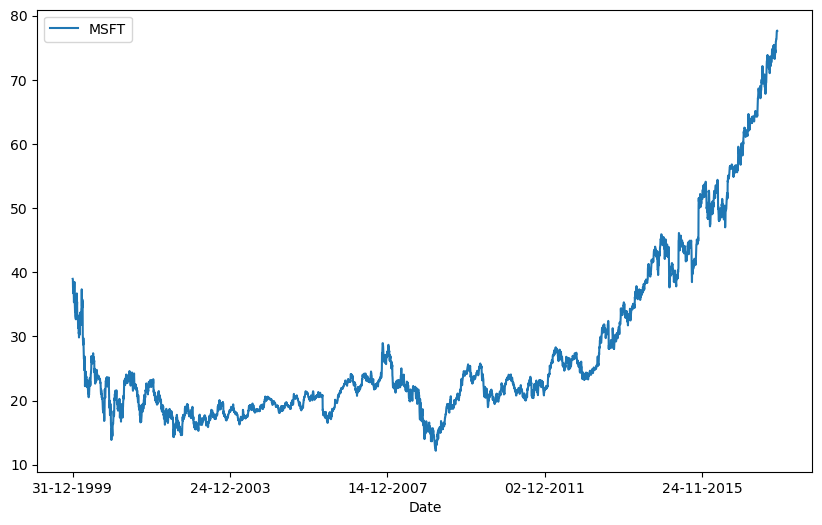

In [4]:
data.plot(figsize=(10, 6));

<Axes: xlabel='Date'>

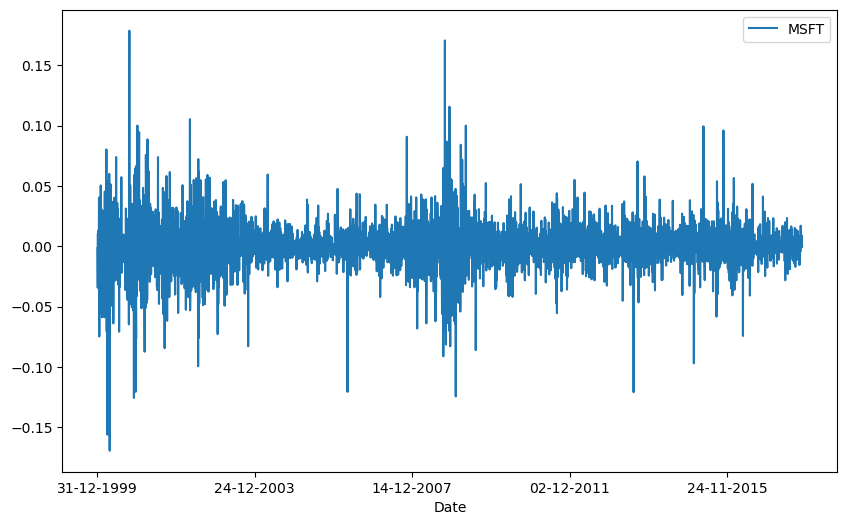

In [5]:
log_returns.plot(figsize = (10, 6))

In [6]:
#Assign the mean value of the log returns to a variable, called “U”, and their variance to a variable, called “var”

u = log_returns.mean()
u

MSFT    0.000154
dtype: float64

In [7]:
var = log_returns.var()
var

MSFT    0.000376
dtype: float64

In [8]:
#Calculate the drift

drift = u - (0.5 * var)
drift

MSFT   -0.000034
dtype: float64

In [9]:
#Store the standard deviation of the log returns in a variable, called “stdev”.

stdev = log_returns.std()
stdev

MSFT    0.019397
dtype: float64

In [10]:
type(drift)

pandas.core.series.Series

In [11]:
type(stdev)

pandas.core.series.Series

In [12]:
stdev.values

array([0.01939682])

In [13]:
norm.ppf(0.95)

#The distance between this event and the mean will be approximately 1.65 std.

1.6448536269514722

In [14]:
x = np.random.rand(10,2)
x

array([[0.11517577, 0.85489888],
       [0.68899343, 0.94047199],
       [0.25686349, 0.21461026],
       [0.09281613, 0.78816116],
       [0.24133237, 0.48607926],
       [0.42587684, 0.51914166],
       [0.23134863, 0.72297193],
       [0.0652284 , 0.72115647],
       [0.34318787, 0.33321285],
       [0.7052693 , 0.41268348]])

In [15]:
norm.ppf(x)

array([[-1.19945377,  1.05767806],
       [ 0.49299921,  1.55874803],
       [-0.65304546, -0.79052621],
       [-1.32361103,  0.80005715],
       [-0.70202312, -0.03490119],
       [-0.18688132,  0.04799946],
       [-0.7344127 ,  0.59169307],
       [-1.51230303,  0.58628047],
       [-0.40377832, -0.4310587 ],
       [ 0.5396167 , -0.22064743]])

In [16]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 0.97027712, -0.10509566],
       [-0.04877876,  0.80222242],
       [-0.41214021, -1.76945245],
       [-1.68797063, -0.31891661],
       [ 0.14156977,  1.34636604],
       [-0.06596679, -0.29787871],
       [-0.42838536, -0.38063133],
       [ 0.32676794,  1.26152284],
       [-0.5024975 , -1.50088346],
       [-0.38845425,  1.47629493]])

In [17]:
#Forecast future stock prices for every trading day a year ahead. So, assign 250 to “t_intervals”.
#Let’s examine 10 possible outcomes. Bind “iterations” to the value of 10.

t_intervals = 250
iterations = 10

In [18]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[0.98691014, 0.97420392, 1.00281693, ..., 0.98387374, 1.0205451 ,
        1.01607031],
       [0.99113939, 0.98944766, 1.00361697, ..., 0.98569616, 0.99216167,
        1.03265642],
       [0.9954371 , 0.97673614, 0.99048346, ..., 0.95750982, 1.0244754 ,
        0.98493952],
       ...,
       [1.03641353, 1.02043549, 1.03261144, ..., 0.9942903 , 0.9674436 ,
        0.9922728 ],
       [0.99735743, 1.00631551, 0.9846986 , ..., 1.03710526, 1.02718261,
        1.00170975],
       [1.02026466, 0.95769775, 1.01932511, ..., 1.00327266, 0.99332566,
        1.02360437]])

In [19]:
data.iloc[-1] #ราคาวันที่ 18-10-2017 (ราคาล่างสุด)

MSFT    77.610001
Name: 18-10-2017, dtype: float64

In [20]:
S0 = data.iloc[-1]
S0

MSFT    77.610001
Name: 18-10-2017, dtype: float64

In [21]:
price_list = np.zeros_like(daily_returns) 
#we can replace the zeros with the expected stock prices by using a loop

In [22]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
price_list[0] = S0
price_list

array([[77.610001, 77.610001, 77.610001, ..., 77.610001, 77.610001,
        77.610001],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       ...,
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ]])

In [24]:
#Create a loop in the range (1, t_intervals) that reassigns to the price in time t the product of the price in day (t-1) with the value of the daily returns in t.

for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]
    
#price_list[t] = price today
#price_list[t-1] = price yesterday

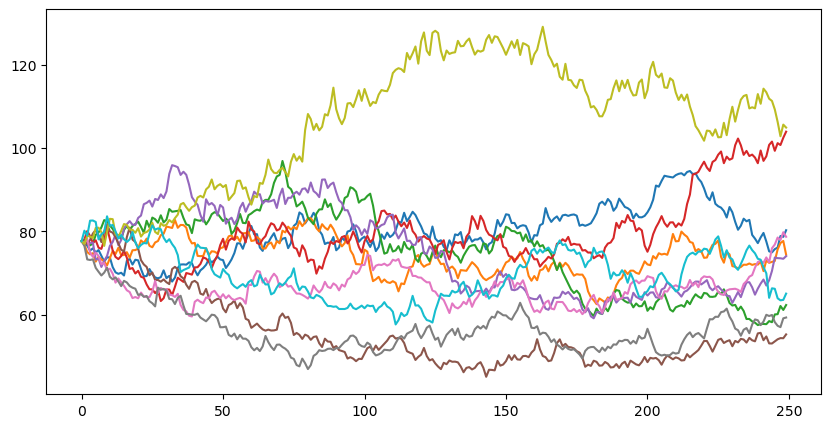

In [26]:
plt.figure(figsize=(10,5))
plt.plot(price_list);